Here I Loaded the Dataset

In [6]:
import pandas as pd

# Load the dataset (update the path as necessary)
data = pd.read_csv('breast cancer.csv')

# Display the first few rows
print(data.head())


   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [7]:
# Checking for missing values
missing_data = data.isnull().sum()

# Summarize the missing data to understand how to handle it
missing_data

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [8]:
# Drop 'Date_of_Last_Visit' if it exists, and remove rows with missing 'Patient_Status'
data = data.drop(columns=['Date_of_Last_Visit'], errors='ignore').dropna(subset=['Patient_Status'])

# Verify no missing values remain in the target column
print(data.isnull().sum())

Age                0
Gender             0
Protein1           0
Protein2           0
Protein3           0
Protein4           0
Tumour_Stage       0
Histology          0
ER status          0
PR status          0
HER2 status        0
Surgery_type       0
Date_of_Surgery    0
Patient_Status     0
dtype: int64


@@ Here I dropped the Date_of_Last_Visit column if it exists and removes rows with missing values in the target column, Patient_Status.

In [9]:
# Convert 'Patient_Status' to binary format
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})

# Define categorical columns
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']

# Apply one-hot encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows to verify encoding
print(data.head())


   Age  Protein1  Protein2  Protein3  Protein4 Date_of_Surgery  \
0   42   0.95256   2.15000  0.007972 -0.048340       20-May-18   
1   54   0.00000   1.38020 -0.498030 -0.507320       26-Apr-18   
2   63  -0.52303   1.76400 -0.370190  0.010815       24-Aug-18   
3   78  -0.87618   0.12943 -0.370380  0.132190       16-Nov-18   
4   42   0.22611   1.74910 -0.543970 -0.390210       12-Dec-18   

   Patient_Status  Gender_MALE  Tumour_Stage_II  Tumour_Stage_III  \
0               1        False             True             False   
1               0        False             True             False   
2               1        False             True             False   
3               1        False            False             False   
4               1        False             True             False   

   Histology_Infiltrating Lobular Carcinoma  Histology_Mucinous Carcinoma  \
0                                     False                         False   
1                                 

In [10]:
# Define features (X) and target (y)
X = data.drop(columns=['Patient_Status', 'Date_of_Surgery'], errors='ignore')
y = data['Patient_Status']

# Display the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (321, 14)
Target shape: (321,)


In [11]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (256, 14)
Testing set shape: (65, 14)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics in a tabular format
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
})

print("Performance Metrics:")
print(metrics_df)
print("Confusion Matrix:")
print(conf_matrix)



Performance Metrics:
      Metric     Score
0   Accuracy  0.769231
1  Precision  0.769231
2     Recall  1.000000
3   F1-Score  0.869565
Confusion Matrix:
[[ 0 15]
 [ 0 50]]


In [17]:
# Creating a DataFrame to display the performance metrics in a tabular format
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
})

# Displaying the metrics in a tabular format
metrics_df

,Metric,Score
0,Accuracy,0.769231
1,Precision,0.769231
2,Recall,1.000000
3,F1-Score,0.869565


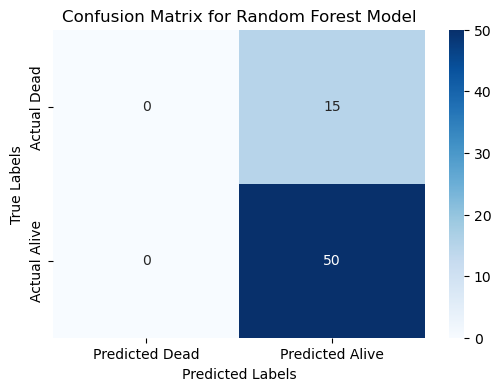

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted Dead", "Predicted Alive"], yticklabels=["Actual Dead", "Actual Alive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


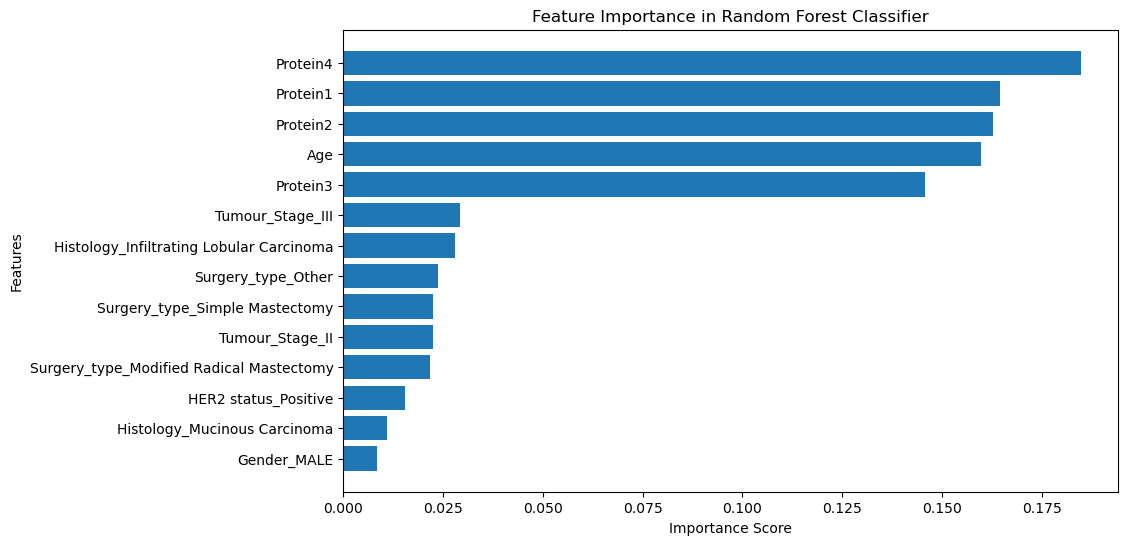

In [33]:
# Extract feature importance scores
feature_importances = model.feature_importances_
features = X.columns
indices = feature_importances.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Classifier")
plt.gca().invert_yaxis()
plt.show()
